In [178]:
#리뷰 따와서 형태소 분석기에 따른 분석 비교
#하나의 웹툰에서 키워드(명사로)분석
#하나의 웹툰의 날짜별 키워드 분석(감성이 들어갈 수 있는 거 위주 형용사, 부사), 독자 반응
#특정 키워드가 들어간 리뷰를 가지고 분석(ex. 작가)

### 웹툰 DB 생성 및 크롤링

In [1]:
#웹툰 정보 DB 저장

webtoon_db= {}


In [2]:
#db 구축
import requests
import json

url= 'https://comic.naver.com/api/webtoon/titlelist/weekday?order=user'

resp= requests.get(url)
print(resp.text)
dic_resp= json.loads(resp.text)

wekday= ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']
for day in wekday:
    for toon_name in dic_resp['titleListMap'][day]:
        title_name= toon_name['titleName']
        title_id= toon_name['titleId']
        wek_lower= day.lower()[:-3]


        webtoon_db[title_name]={title_name:title_id}


{"titleListMap":{"FRIDAY":[{"titleId":821192,"titleName":"좋아? 죽어!","author":"박만사, 김용키 / 죠","thumbnailUrl":"https://image-comic.pstatic.net/webtoon/821192/thumbnail/thumbnail_IMAG21_156483ac-3740-4cbf-8150-0f24595bae52.jpg","up":false,"rest":false,"bm":false,"adult":true,"starScore":9.52104,"viewCount":0,"openToday":false,"potenUp":false,"bestChallengeLevelUp":false,"finish":false,"new":false},{"titleId":641253,"titleName":"외모지상주의","author":"박태준","thumbnailUrl":"https://image-comic.pstatic.net/webtoon/641253/thumbnail/thumbnail_IMAG21_01672165-03c8-44b1-ba0e-ef82c9cfcd10.jpg","up":false,"rest":false,"bm":false,"adult":false,"starScore":9.47487,"viewCount":354266224,"openToday":false,"potenUp":false,"bestChallengeLevelUp":false,"finish":false,"new":false},{"titleId":776601,"titleName":"광마회귀","author":"JP / 이히 / 유진성","thumbnailUrl":"https://image-comic.pstatic.net/webtoon/776601/thumbnail/thumbnail_IMAG21_7365135131254864183.jpg","up":false,"rest":false,"bm":false,"adult":false,"starScore

In [3]:
toon_title = input('웹툰 이름: ')

In [4]:
title_id= webtoon_db[toon_title][toon_title]

In [5]:
# 고른 웹툰의 최신화 정보
basic_url='https://comic.naver.com/api/article/list'

headers= {
    'referer':'https://comic.naver.com/webtoon/detail?titleId=737628&no=158&week=sun',
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36 Edg/122.0.0.0'
}

params= {
    'titleId':f'{title_id}'
}
resp= requests.get(basic_url, params=params, headers=headers)

jsn= json.loads(resp.text)
new_toon= jsn['articleList'][0]['no']

In [6]:
#웹툰 댓글 크롤링 파라미터 설정
params={
        'ticket':'comic',
        'templateId':'webtoon',
        'pool':'cbox3',
        '_cv':'20240319154009',
        '_callback':'',
        'lang':'ko',
        'country':'KR',
        'objectId':f'{title_id}_{new_toon}',
        'categoryId':'',
        'pageSize':'15',
        'indexSize':'10',
        'groupId': f'{title_id}',
        'listType':'OBJECT',
        'pageType':'more',
        'page':'1',
        'currentPage':'1',
        'refresh':'true',
        'sort':'best',
        '_':'1710907954603'

}

In [7]:
best_comments=[]

In [8]:
url= 'https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json'

headers= {
    'referer':'https://comic.naver.com/webtoon/detail?titleId=737628&no=158&week=sun',
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36 Edg/122.0.0.0'
}
reqs= requests.get(url, params=params,headers=headers)

reqs_j=reqs.text[10:-2]
jsn= json.loads(reqs_j)
for comment in jsn['result']['commentList']:
    best_comments.append(comment['contents'])

In [9]:
best_comments

['사심 없는거 맞음? ㅋㅋㅋ 저렇게 상쾌한 웃음은 처음인데 ㅋㅋㅋ',
 '저러니 성태훈한테 예의범절패치를 주입시켰구나ㅋㅋㅋ',
 '김부장 존나 든든하면 개추 ㅋㅋㅋ',
 '진철이 형도 ㅋㅋㅋㅋ웃긴게 남자들은 쉽게 안죽는다는게 개웃기네',
 '김부장 정태양 키우는거 보니까\n\n성태훈 기강 어떻게 잡았는지 \n개궁금하네 ㅋㅋㅋㅋㄱㅋ',
 '성태훈 버릇도 고쳐준게 김부장인데 정태양 싸가지 고치는건 쉽지 ㅋㅋㅋ',
 '사심은 없다 (적진한바탕으로 밀며)',
 '눈에 넣어도 안아픈 딸자식 마음 이용했던 놈인데 저정도면 많이 봐줬다고 생각함',
 '김부장님 우리 강인이도 부탁드립니다',
 '김부장 개간지 나네',
 '김부장은 걱정이 1도 안되네ㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '이렇게 보면 김부장이 채원석 착하게 대해줬네 ㅋㅋㅋㅋ',
 '눈 가리면 웃고\n입가리면 세상 진지한 눈',
 '상황 타개 능력 : 김부장 &gt;&gt;김갑룡 주먹패\n순수 전투 능력 : 이도규 &gt;&gt;김부장',
 '총동수 이길 사람이 김부장이네 군사전문가니까']

### 모든 화의 베스트 댓글

In [10]:
title_id= webtoon_db[toon_title][toon_title]

In [11]:
# 최신화 정보
basic_url='https://comic.naver.com/api/article/list'

headers= {
    'referer':'https://comic.naver.com/webtoon/detail?titleId=737628&no=158&week=sun',
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36 Edg/122.0.0.0'
}

params= {
    'titleId':f'{title_id}'
}
resp= requests.get(basic_url, params=params, headers=headers)

jsn= json.loads(resp.text)
new_toon= jsn['articleList'][0]['no']

In [12]:
print(new_toon)

126


In [13]:
best_comments=[]

In [14]:
for new in range(1, new_toon+1):
    
        params={
                'ticket':'comic',
                'templateId':'webtoon',
                'pool':'cbox3',
                '_cv':'20240319154009',
                '_callback':'',
                'lang':'ko',
                'country':'KR',
                'objectId':f'{title_id}_{new}',
                'categoryId':'',
                'pageSize':'15',
                'indexSize':'10',
                'groupId': f'{title_id}',
                'listType':'OBJECT',
                'pageType':'more',
                'page':'1',
                'currentPage':'1',
                'refresh':'true',
                'sort':'best',
                '_':'1710907954603'

        }
        url= 'https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json'

        headers= {
        'referer':'https://comic.naver.com/webtoon/detail?titleId=737628&no=158&week=sun',
        'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36 Edg/122.0.0.0'
        }
        reqs= requests.get(url, params=params,headers=headers)

        reqs_j=reqs.text[10:-2]
        jsn= json.loads(reqs_j)
        for comment in jsn['result']['commentList']:
                best_comments.append(comment['contents'])
        

In [197]:
best_comments[-10:]

['성태훈 버릇도 고쳐준게 김부장인데 정태양 싸가지 고치는건 쉽지 ㅋㅋㅋ',
 '사심은 없다 (적진한바탕으로 밀며)',
 '눈에 넣어도 안아픈 딸자식 마음 이용했던 놈인데 저정도면 많이 봐줬다고 생각함',
 '김부장님 우리 강인이도 부탁드립니다',
 '김부장 개간지 나네',
 '김부장은 걱정이 1도 안되네ㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '이렇게 보면 김부장이 채원석 착하게 대해줬네 ㅋㅋㅋㅋ',
 '눈 가리면 웃고\n입가리면 세상 진지한 눈',
 '상황 타개 능력 : 김부장 &gt;&gt;김갑룡 주먹패\n순수 전투 능력 : 이도규 &gt;&gt;김부장',
 '총동수 이길 사람이 김부장이네 군사전문가니까']

### 전처리

In [18]:
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
from konlpy.tag import Komoran

import re

okt= Okt()
kkma= Kkma()
hannanum= Hannanum()
komoran= Komoran()

#형태소 분석기 간 비교
for i in best_comments[-10:-7]:
    print('okt 형태소 분석기:',okt.pos(i))
    print('kkma 형태소 분석기:',kkma.pos(i))
    print('hannaum 형태소 분석기:',hannanum.pos(i))
    print('komoran 형태소 분석기:',komoran.pos(i))
    print('\n')


okt 형태소 분석기: [('성태', 'Noun'), ('훈', 'Noun'), ('버릇', 'Noun'), ('도', 'Josa'), ('고쳐', 'Verb'), ('준', 'Noun'), ('게', 'Josa'), ('김부', 'Noun'), ('장', 'Suffix'), ('인데', 'Josa'), ('정태양', 'Noun'), ('싸가지', 'Noun'), ('고치는건', 'Verb'), ('쉽지', 'Verb'), ('ㅋㅋㅋ', 'KoreanParticle')]
kkma 형태소 분석기: [('성', 'NNG'), ('태', 'NNG'), ('훈', 'NNG'), ('버릇', 'NNG'), ('도', 'JX'), ('고치', 'VV'), ('어', 'ECS'), ('주', 'VXV'), ('ㄴ', 'ETD'), ('것', 'NNB'), ('이', 'JKS'), ('김', 'NNG'), ('부장', 'NNG'), ('이', 'VCP'), ('ㄴ데', 'ECE'), ('정태', 'NNG'), ('양', 'XSN'), ('싸가지', 'NNG'), ('고치', 'VV'), ('는', 'ETD'), ('것', 'NNB'), ('은', 'JKS'), ('쉽', 'VA'), ('지', 'ECD'), ('ㅋㅋㅋ', 'EMO')]
hannaum 형태소 분석기: [('성태훈', 'N'), ('버릇', 'N'), ('도', 'J'), ('고치', 'P'), ('어', 'E'), ('주', 'P'), ('ㄴ게', 'E'), ('김부장인데', 'N'), ('정태양', 'N'), ('쓰', 'P'), ('어', 'E'), ('가', 'P'), ('지', 'E'), ('고치는건', 'N'), ('쉽', 'P'), ('지', 'E'), ('ㅋㅋㅋ', 'N')]
komoran 형태소 분석기: [('성태', 'NNP'), ('훈', 'NNP'), ('버릇', 'NNP'), ('도', 'JX'), ('고치', 'VV'), ('어', 'EC'), ('주', 'VX'), ('ㄴ', 'ETM

### counterizing, cosine 유사도 구하기

In [199]:
def make_BOW(document:list) ->dict:
    words= set(document)
    BOW= dict()
    for word in words:
        if word not in BOW:
            BOW[word]=len(BOW)
    return BOW

In [200]:
def make_cntvec(document:list, BOW:list)->list:
    count_vector= [0]*len(BOW)

    for idx, word in enumerate(BOW.keys()):
        count_vector[idx]=document.count(word)
    return count_vector

In [201]:
BOW_sentence= okt.morphs(best_comments[-8])+okt.morphs(best_comments[-7])+okt.morphs(best_comments[-6])

bows= make_BOW(BOW_sentence)

review_cntvec= make_cntvec(best_comments[-6], bows)
print(list(bows.keys()))
print(review_cntvec)

['안', '넣어도', '부탁드립니다', '김부', '마음', '이', '에', '장님', '딸', '했던', '장', '강인', '개간', '눈', '줬다고', '지', '도', '인데', '생각', '아픈', '놈', '저', '봐', '정도', '자식', '함', '이용', '우리', '면', '나네', '많이']
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


### countervectorizer를 이용한 단어 인코딩

In [202]:
from sklearn.feature_extraction.text import CountVectorizer
corpus= [best_comments[-8]+best_comments[-7]+best_comments[-6]]
vector= CountVectorizer()
print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
{'눈에': 5, '넣어도': 3, '안아픈': 12, '딸자식': 6, '마음': 7, '이용했던': 14, '놈인데': 4, '저정도면': 15, '많이': 8, '봐줬다고': 9, '생각함김부장님': 11, '우리': 13, '강인이도': 0, '부탁드립니다김부장': 10, '개간지': 1, '나네': 2}


In [203]:
#코사인 유사도 구하기
from numpy import dot
from numpy.linalg import norm

def cos_sim(A,B):
    return dot(A,B)/norm(A)*norm(B)



In [204]:
print(cos_sim(make_cntvec(best_comments[-8],bows), make_cntvec(best_comments[-7],bows)))

2.138089935299395


### TF-IDF

In [16]:
import pandas as pd
from math import log

In [24]:
corpus= list([best_comments[-7],best_comments[-6],best_comments[-5]])
vocab= list(set(w for doc in corpus for w in doc.split()))
vocab.sort()
vocab

['1도',
 '강인이도',
 '개간지',
 '걱정이',
 '김부장',
 '김부장님',
 '김부장은',
 '나네',
 '부탁드립니다',
 '안되네ㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '우리']

In [23]:
corpus

['김부장님 우리 강인이도 부탁드립니다', '김부장 개간지 나네', '김부장은 걱정이 1도 안되네ㅋㅋㅋㅋㅋㅋㅋㅋㅋ']

In [25]:
N= len(corpus)

def tf(t, d):
    return d.count(t)

def idf(t):
    df= 0
    for doc in corpus:
        df+=t in doc
    return log(N/(df+1))

def tfidf(t, d):
    return tf(t,d)*idf(t)

In [26]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = corpus[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tf(t, d))
tf_ = pd.DataFrame(result, columns = vocab)
tf_

,1도,강인이도,개간지,걱정이,김부장,김부장님,김부장은,나네,부탁드립니다,안되네ㅋㅋㅋㅋㅋㅋㅋㅋㅋ,우리
0,0,1,0,0,1,1,0,0,1,0,1
1,0,0,1,0,1,0,0,1,0,0,0
2,1,0,0,1,1,0,1,0,0,1,0


In [31]:
#정상적인 DTM이 출력되어짐. 이제 각 단어에 대한 IDF 값을 구해보자

result = []
for j in range(len(vocab)):
    t = vocab[j]
    if idf(t)<0:
        result.append(0)
    else:
        result.append(idf(t))
    

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
1도,0.405465
강인이도,0.405465
개간지,0.405465
걱정이,0.405465
김부장,0.000000
김부장님,0.405465
김부장은,0.405465
나네,0.405465
부탁드립니다,0.405465
안되네ㅋㅋㅋㅋㅋㅋㅋㅋㅋ,0.405465


In [32]:
result = []
for i in range(N):
    result.append([])
    d = corpus[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,1도,강인이도,개간지,걱정이,김부장,김부장님,김부장은,나네,부탁드립니다,안되네ㅋㅋㅋㅋㅋㅋㅋㅋㅋ,우리
0,0.000000,0.405465,0.000000,0.000000,-0.287682,0.405465,0.000000,0.000000,0.405465,0.000000,0.405465
1,0.000000,0.000000,0.405465,0.000000,-0.287682,0.000000,0.000000,0.405465,0.000000,0.000000,0.000000
2,0.405465,0.000000,0.000000,0.405465,-0.287682,0.000000,0.405465,0.000000,0.000000,0.405465,0.000000


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
corpus= list([best_comments[-7],best_comments[-6],best_comments[-5]])

vector= CountVectorizer()
print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)

[[0 1 0 0 0 1 0 0 1 0 1]
 [0 0 1 0 1 0 0 1 0 0 0]
 [1 0 0 1 0 0 1 0 0 1 0]]
{'김부장님': 5, '우리': 10, '강인이도': 1, '부탁드립니다': 8, '김부장': 4, '개간지': 2, '나네': 7, '김부장은': 6, '걱정이': 3, '1도': 0, '안되네ㅋㅋㅋㅋㅋㅋㅋㅋㅋ': 9}


### soynlp 형태소 분석기 사용

In [205]:
with open('comment.txt', 'w') as f:
    f.write('  '.join(best_comments))

In [206]:
from soynlp import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2


corpus= DoublespaceLineCorpus('comment.txt')
len(corpus)



noun_extractor= LRNounExtractor_v2(verbose=True)
nouns= noun_extractor.train_extract(corpus)

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 11915 from 2481 sents. mem=1.304 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=19765, mem=1.308 Gb
[Noun Extractor] batch prediction was completed for 3530 words
[Noun Extractor] checked compounds. discovered 191 compounds
[Noun Extractor] postprocessing detaching_features : 1313 -> 1273
[Noun Extractor] postprocessing ignore_features : 1273 -> 1242
[Noun Extractor] postprocessing ignore_NJ : 1242 -> 1242
[Noun Extractor] 1242 nouns (191 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=1.316 Gb                    
[Noun Extractor] 43.66 % eojeols are covered


In [207]:
nouns_sorted= sorted(nouns.items(), key=lambda item:item[1].frequency, reverse=True)
nouns_sorted

[('김부장', NounScore(frequency=314, score=0.9841269841269841)),
 ('이도규', NounScore(frequency=139, score=0.8507462686567164)),
 ('성한수', NounScore(frequency=116, score=0.9591836734693877)),
 ('외지주', NounScore(frequency=103, score=1.0)),
 ('ㅋㅋㅋ', NounScore(frequency=84, score=1.0)),
 ('안', NounScore(frequency=75, score=0.875)),
 ('박진철', NounScore(frequency=73, score=1.0)),
 ('왜', NounScore(frequency=70, score=1.0)),
 ('아빠', NounScore(frequency=60, score=0.9230769230769231)),
 ('준구', NounScore(frequency=56, score=0.8571428571428571)),
 ('성태훈', NounScore(frequency=50, score=1.0)),
 ('사람', NounScore(frequency=46, score=1.0)),
 ('너무', NounScore(frequency=46, score=1.0)),
 ('거', NounScore(frequency=41, score=0.7142857142857143)),
 ('개추', NounScore(frequency=40, score=1.0)),
 ('다음화', NounScore(frequency=39, score=1.0)),
 ('제', NounScore(frequency=38, score=0.9444444444444444)),
 ('박태준', NounScore(frequency=37, score=1.0)),
 ('말', NounScore(frequency=37, score=0.6)),
 ('수', NounScore(frequency=37,

### 댓글 통계 정보

In [208]:
import numpy as np
import pandas as pd
best_comments_length=[]

for i in best_comments:
    best_comments_length.append(len(i))

best_comments_length= pd.Series(best_comments_length)

print('댓글 길이 최댓값:',np.max(best_comments_length))
print('댓글 길이 최솟값:',np.min(best_comments_length))
print('댓글 길이 평균값:',np.mean(best_comments_length))
print('댓글 길이 표준편차:',np.std(best_comments_length))
print('댓글 길이 중간값:',np.median(best_comments_length))
print('댓글 길이 제1사분위:',np.percentile(best_comments_length,25))
print('댓글 길이 제3사분위:',np.percentile(best_comments_length, 75))


댓글 길이 최댓값: 511
댓글 길이 최솟값: 3
댓글 길이 평균값: 58.63676389653275
댓글 길이 표준편차: 95.64923496710162
댓글 길이 중간값: 28.0
댓글 길이 제1사분위: 19.0
댓글 길이 제3사분위: 50.0


### ngram

In [19]:
from nltk import ConditionalFreqDist
from nltk.util import ngrams



In [20]:
sentences=[]
def tokenize(doc):
    tokens= ['/'.join(t) for t in okt.pos(doc)]
    return tokens

for d in best_comments:
    tokens = tokenize(d)
    bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
    sentences += [t for t in bigram]


In [38]:
sentences

[('SS', '이/Determiner'),
 ('이/Determiner', '거/Noun'),
 ('거/Noun', '원래/Noun'),
 ('원래/Noun', '태준/Noun'),
 ('태준/Noun', '이형/Noun'),
 ('이형/Noun', '이/Josa'),
 ('이/Josa', '미/Adjective'),
 ('미/Adjective', 'X/Alpha'),
 ('X/Alpha', '아빠/Noun'),
 ('아빠/Noun', '로/Josa'),
 ('로/Josa', '제목/Noun'),
 ('제목/Noun', '지었는데/Verb'),
 ('지었는데/Verb', '김부/Noun'),
 ('김부/Noun', '장/Suffix'),
 ('장/Suffix', '으로/Josa'),
 ('으로/Josa', '제목/Noun'),
 ('제목/Noun', '바뀌었네/Verb'),
 ('바뀌었네/Verb', '외지주/Verb'),
 ('외지주/Verb', '김부/Noun'),
 ('김부/Noun', '장/Suffix'),
 ('장/Suffix', '과거/Noun'),
 ('과거/Noun', '이야기/Noun'),
 ('이야기/Noun', '맞음/Verb'),
 ('맞음/Verb', 'SE'),
 ('SS', '박태준/Noun'),
 ('박태준/Noun', '만화/Noun'),
 ('만화/Noun', '특징/Noun'),
 ('특징/Noun', ':/Punctuation'),
 (':/Punctuation', '양산/Noun'),
 ('양산/Noun', '형/Suffix'),
 ('형/Suffix', '이라고/Josa'),
 ('이라고/Josa', '욕/Noun'),
 ('욕/Noun', '하는데/Verb'),
 ('하는데/Verb', '존/Noun'),
 ('존/Noun', './Punctuation'),
 ('./Punctuation', '나/Noun'),
 ('나/Noun', '재밌음/Adjective'),
 ('재밌음/Adjective', 'SE'),
 ('S

In [22]:
from nltk.probability import ConditionalProbDist, MLEProbDist #사전 확률, 우도(likelyhood)


In [23]:
cfd= ConditionalFreqDist(sentences)
cpd= ConditionalProbDist(cfd, MLEProbDist)

def korean_most_common(c, n, pos=None):
    if pos is None:
        return cfd[tokenize(c)[0]].most_common(n)
    else:
        return cfd["/".join([c, pos])].most_common(n)

In [37]:
korean_most_common('김부', 10)

[('장/Suffix', 292),
 ('장이/Suffix', 84),
 ('장님/Noun', 4),
 ('장도/Noun', 4),
 ('장한테는/Adjective', 2),
 ('좡/Noun', 1),
 ('장보/Noun', 1),
 ('장한테서/Adjective', 1)]

### 불용어 제거

In [209]:
def preprocessing(comment, okt, remove_stopwords= False, stopword=[]):
    comment_text= re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',comment)

    tokens_comment= okt.morphs(comment_text)

    if remove_stopwords:
        tokens_comment= [token for token in tokens_comment if not token in stopword]
    return tokens_comment



In [210]:
stop_words= ['은','을', '는','이','가','하','아','것','저','들','의','있','되','수','보','주', '등','한','에','도','를','로','왜','과','에서','으로','그','님','에게','','것','거','진짜']
otk= Okt()
kkma= Kkma()
clean_test_comments= []
for comment in best_comments:
    if type(comment)==str:

        clean_test_comments.append(preprocessing(comment, hannanum, remove_stopwords=True, stopword=stop_words))
    else:
        clean_test_comments.append([])



In [ ]:
#2차원 리스트를 1차원 리스트로 바꾸는데 사용
clean_test_comments= sum(clean_test_comments, [])


### 명사로 된 워드 클라우드 생성

In [ ]:
#명사만 추출
clean_test_comments_nouns=[]
for i in clean_test_comments:
    if okt.pos(i)[0][1]=='Noun':
        clean_test_comments_nouns.append(i)

In [ ]:
clean_test_comments_nouns

['원래',
 '태준',
 '이형',
 '아빠',
 '제목',
 '김부',
 '장',
 '제목',
 '김부',
 '장',
 '과거',
 '이야기',
 '박태준',
 '만화',
 '특징',
 '양산',
 '형',
 '욕',
 '존나',
 '아빠',
 '몸',
 '딸',
 '회사원',
 '인',
 '줄',
 '안건',
 '개',
 '문제',
 '정종택',
 '작가',
 '작품',
 '아예',
 '기록',
 '처리',
 '연재',
 '자격',
 '박탈',
 '사람',
 '임',
 '정도',
 '짓',
 '말',
 '사람',
 '떡',
 '하니',
 '다시',
 '정식',
 '작가',
 '자리',
 '건',
 '때',
 '전부',
 '당장',
 '커버',
 '처',
 '겉',
 '네이버',
 '웹툰',
 '저작권',
 '법',
 '존중',
 '쇼',
 '뒤',
 '언제',
 '다시',
 '정식',
 '작가',
 '각',
 '재고',
 '해석',
 '거임',
 '웹툰',
 '독자',
 '및',
 '정식',
 '작가',
 '꿈',
 '작가',
 '지망',
 '생',
 '전부',
 '빅엿',
 '이제',
 '김부',
 '장',
 '싸움',
 '씬',
 '때',
 '마다',
 '갈드',
 '컵',
 '양영순',
 '진짜',
 '어쨌든',
 '명목',
 '상',
 '완결',
 '각',
 '때문',
 '미리보기',
 '쿠키',
 '미리보기',
 '트래이싱',
 '작가',
 '다시',
 '연재',
 '미리보기',
 '또',
 '만화',
 '등장인물',
 '네이버웹툰',
 '사장',
 '친목질',
 '인',
 '건',
 '그냥',
 '프로',
 '의식',
 '환',
 '트레이싱',
 '언급',
 '베댓',
 '진짜',
 '가지가지',
 '딸년',
 '말처',
 '김성모',
 '박태준',
 '김성모',
 '복',
 '못',
 '살고',
 '슬램덩크',
 '트레이싱',
 '나락간',
 '작가',
 '임',
 '박태준',
 '월요일',
 '신작',
 '표지',
 '조차',
 '표지',


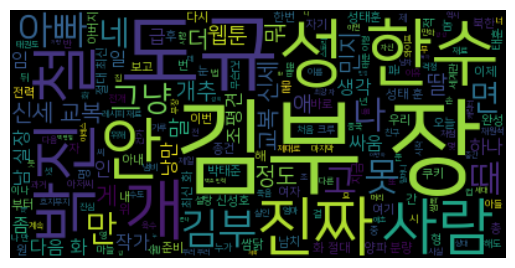

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

fontpath="C:/Users/chldy/AppData/Local/Microsoft/Windows/Fonts/NanumSquareR.ttf"
font=fm.FontProperties(fname=fontpath,size=9)

wordcloud = wordcloud=WordCloud(font_path=fontpath).generate(' '.join(clean_test_comments_nouns))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 하나의 웹툰에서 날짜별 키워드 분석

In [ ]:
toon_title = input('웹툰 이름: ')

In [ ]:
title_id= webtoon_db[toon_title][toon_title]

In [ ]:
# 고른 웹툰의 최신화 정보
basic_url='https://comic.naver.com/api/article/list'

headers= {
    'referer':'https://comic.naver.com/webtoon/detail?titleId=737628&no=158&week=sun',
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36 Edg/122.0.0.0'
}

params= {
    'titleId':f'{title_id}'
}
resp= requests.get(basic_url, params=params, headers=headers)

jsn= json.loads(resp.text)
new_toon= jsn['articleList'][0]['no']

In [ ]:
#웹툰 댓글 크롤링 파라미터 설정
params={
        'ticket':'comic',
        'templateId':'webtoon',
        'pool':'cbox3',
        '_cv':'20240319154009',
        '_callback':'',
        'lang':'ko',
        'country':'KR',
        'objectId':f'{title_id}_{new_toon}',
        'categoryId':'',
        'pageSize':'15',
        'indexSize':'10',
        'groupId': f'{title_id}',
        'listType':'OBJECT',
        'pageType':'more',
        'page':'1',
        'currentPage':'1',
        'refresh':'true',
        'sort':'best',
        '_':'1710907954603'

}

In [ ]:
best_comments=[]

In [ ]:
for new in range(1, new_toon+1):
    
        params={
                'ticket':'comic',
                'templateId':'webtoon',
                'pool':'cbox3',
                '_cv':'20240319154009',
                '_callback':'',
                'lang':'ko',
                'country':'KR',
                'objectId':f'{title_id}_{new}',
                'categoryId':'',
                'pageSize':'15',
                'indexSize':'10',
                'groupId': f'{title_id}',
                'listType':'OBJECT',
                'pageType':'more',
                'page':'1',
                'currentPage':'1',
                'refresh':'true',
                'sort':'best',
                '_':'1710907954603'

        }
        url= 'https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json'

        headers= {
        'referer':'https://comic.naver.com/webtoon/detail?titleId=737628&no=158&week=sun',
        'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36 Edg/122.0.0.0'
        }
        reqs= requests.get(url, params=params,headers=headers)

        reqs_j=reqs.text[10:-2]
        jsn= json.loads(reqs_j)
        for comment in jsn['result']['commentList']:
                if '작가' in comment['contents']:
                        best_comments.append(comment['contents'])
        

In [141]:
best_comments[-10:]


['작가님, 이전부터 자주 발생하는 설정 오류 같은데 하이랭커가 선별인원 한마디에 속는다는게 이해가 잘 안 됩니디.\n\n랭커 되는 것도 힘들고 그 랭커 중에서도 최상위권인 하이랭커가 공격하는 것을 선별인원이 바로 앞에서 버티고, 심지어 가주랑 눈 마주치고 대화하는게 이해가 안됩니다.\n\n차라리 선별인원 / 랭커 / 하이랭커 / 가주 수준이 어느정도인지 재 정리를 해주시면 몰입하기 좋을 것 같아요.',
 '문제가 너무 많다\n1. 일단 스토리가 산으로 감, 너무 많은 서브스토리가 있는데 하나하나 정리 하지 않으니, 뭐가 메인인지 헷갈림.\n심지어 가문 이름도 비슷한데, 내부에서 배신하고 개판이라 누가 누구편인지도 잘 모르겠음\n2. 설정 붕괴\n이건 이미 작가가 설정을 너무 잡다하게 넣다보니 스스로 박살낸듯\n3. 모든 스토리에 게임이 들어감\n게임이 너무 많고 설명하는데 1~2주씩 잡아먹고 게임 규칙도 복잡. 제대로 진행된 게임도 없고, 게임내 게임을 만들고, 게임이 너무 길어지다보니 독자들 이미 지루하고 게임 규칙도 잊음. \n4. 신의탑 이란 제목도 의미가 없어짐\n지금 독차들 한테 몇층인지 물어보면 95퍼는 무슨 층인지 대답 못 할듯\n5. 3부 요약화를 그리던가 대립구조 같은 걸 정리한 화를 만들어주면 좋겠음 5년동안 진행하고 휴제도 많이 했으면  요약본이라도 그려서 알려줘야지. 냅다 그리고 독자는 신경도 안 쓰는 것 같음',
 "작가님, 혹시 협박을 받고 계신다면 엔도르시한테 '장어덮밥'을 말하게 해주세여,,",
 '여러분 우리가 알던 작가님은 1,2부까지입니다 3부부터는 무슨 사정인지는 모르지만 교체 당하였고 처음에는 쌓여왔던 빌드업이 있어서 티가 안났지만 슬슬 바닥이나니까 작가가 바뀐게 티가나네요 ㅎㅎ',
 '문제점 요약 \n\n1. 이상한 게임을 진행하며 스토리전개 지연 \n\n진짜 압도적으로 가장 큰 문제임 \n\n게임을 하는 와중에 소비되는 캐릭터가 가주라는 점은 작가가 도대체 무슨생각을 하는건지 우리가 알던 사람이 만화를 그리는지가 의문

In [135]:
def preprocessing(comment, okt, remove_stopwords= False, stopword=[]):
    comment_text= re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',comment)

    tokens_comment= okt.morphs(comment_text)

    if remove_stopwords:
        tokens_comment= [token for token in tokens_comment if not token in stopword]
    return tokens_comment


In [154]:
stop_words= ['다','은','을', '는','이','가','하','아','것','저','들','의','있','되','수','보','주', '등','한','에','도','를','로','왜','과','에서','으로','그','님','에게','','것','거','어떻게','이렇게','너무','작가']
otk= Okt()
kkma= Kkma()
clean_test_comments= []
for comment in best_comments:
    if type(comment)==str:

        clean_test_comments.append(preprocessing(comment, okt, remove_stopwords=True, stopword=stop_words))
    else:
        clean_test_comments.append([])



In [172]:
clean_test_comments_old= sum(clean_test_comments[:100],[])
clean_test_comments_new= sum(clean_test_comments[655:],[])

In [173]:
#형용사, 동사, 명사 추출
clean_test_comments_old_sent=[]
clean_test_comments_new_sent=[]
for i in clean_test_comments_old:
    if okt.pos(i)[0][1] in ['Adjective','verb','Noun']:
        clean_test_comments_old_sent.append(i)

for i in clean_test_comments_new:
    if okt.pos(i)[0][1] in ['Adjective','verb','Noun']:
        clean_test_comments_new_sent.append(i)
        

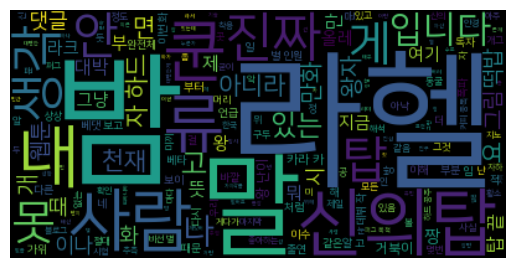

In [174]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

fontpath="C:/Users/chldy/AppData/Local/Microsoft/Windows/Fonts/NanumSquareR.ttf"
font=fm.FontProperties(fname=fontpath,size=9)

wordcloud = wordcloud=WordCloud(font_path=fontpath).generate(' '.join(clean_test_comments_old_sent))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

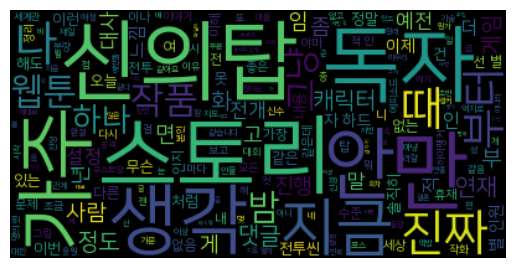

In [177]:
wordcloud = wordcloud=WordCloud(font_path=fontpath).generate(' '.join(clean_test_comments_new_sent))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()